# Segmentation Data from Satellite Imagery

Segmentation is process of partitioning raster into some non-overlapping partitions, called segments [1] . Input of segmentation is patched raster for all Indonesia grid. We use segutils.runShepherdSegmentation function on rsgislib library. This segmentation method has four steps: 
1. A seeding step: identifies the unique spectral signatures within the image,  
2. A clumping process : to create unique regions, 
3. An elimination process : to remove regions below the minimum mapping unit, and, 
4. Relabelled the image

In [9]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rsgislib.segmentation import segutils
from rsgislib.segmentation import tiledsegsingle

The input raster we used is patched raster. The input raster we use is showed below:  

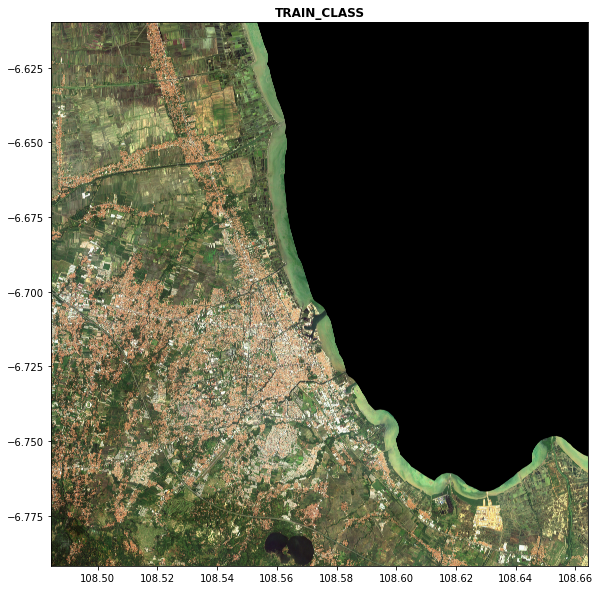

In [11]:
inImage='input/32_Jabar_2020_ID-1897.tif'
outputClumps='output clumps/ID-1897_notile_1000px_processInMem_specBand.tif'

rds = rasterio.open(inImage)
fig, ax = plt.subplots(1,1, figsize=(10,10))
show(rds, ax=ax, title = "TRAIN_CLASS")
plt.show()

The initial number of cluster centres to be produced is 6 and the minimum pixel of each clumps is 500 pixel.

In [10]:
%%time
segutils.runShepherdSegmentation(inImage,
                                 outputClumps,
                                 numClusters=8,
                                 minPxls=1000,
                                 bands=[1,2,3],
                                 gdalformat='GTiff',
                                 kmMaxIter=5,
                                 distThres=500,
                                 noStats=True,
                                 noStretch=True,
                                 processInMem=True)

Subsetting the image bands
Performing KMeans.
Apply KMeans to image.
Eliminate Single Pixels.
Perform clump.
Eliminate small pixels.
Relabel clumps.
Deleting file: .\32_Jabar_2020_ID-1897_kmeansclusters.gmtxt
Deleting file: .\32_Jabar_2020_ID-1897_kmeans.tif
Deleting file: .\32_Jabar_2020_ID-1897_kmeans.tif.aux.xml
Deleting file: .\32_Jabar_2020_ID-1897_kmeans_nosgl.tif
Deleting file: .\32_Jabar_2020_ID-1897_clumps.tif
Deleting file: .\32_Jabar_2020_ID-1897_clumps_elim.tif
Deleting file: .\32_Jabar_2020_ID-1897_bselect.tif
Wall time: 5min 7s


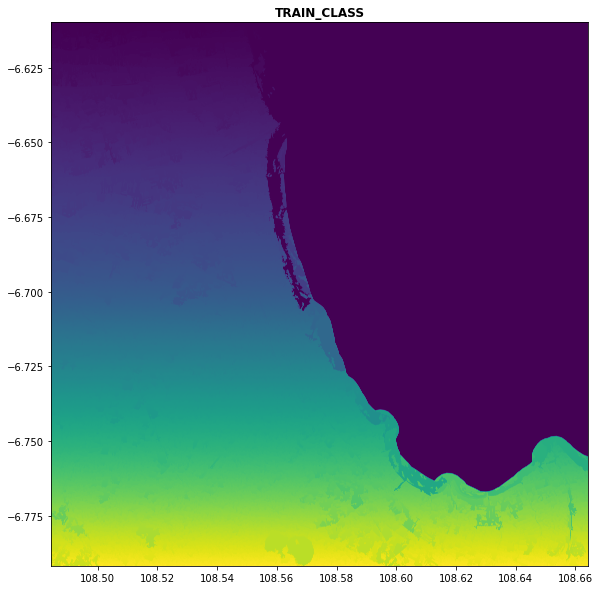

In [13]:
rds = rasterio.open(outputClumps)
fig, ax = plt.subplots(1,1, figsize=(10,10))
show(rds, ax=ax, title = "TRAIN_CLASS")
plt.show()

* https://www.isprs.org/proceedings/xxxiv/part4/pdfpapers/358.pdf